# AIRLINES CUSTOMER SATISFACTION

In this project, we're diving into the world of air travel to understand what makes passengers happy or dissatisfied. We have a bunch of data, including details about passengers, their flights, and how they rate different aspects of their journey. Our goal is to figure out what factors influence passenger satisfaction.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

In [3]:
df=pd.read_csv(r"D:\MUZA Imr\\ML\\ML project\\Airline.csv")
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
#Making a copy of a df
df1 = df.copy()

In [6]:
df1[df1.duplicated()].shape

(0, 23)

# Replacing Column sapce with underscore

In [7]:
# Replace spaces with underscores in column names
df1.columns = df1.columns.str.replace(' ', '_')
df1.columns = df1.columns.str.replace('-', '_')
df1

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


# Encoding satisfaction column with - satisfied as 1, dissatisfied as 0

In [8]:
df1['satisfaction'].replace({'dissatisfied': 0, 'satisfied': 1},inplace = True)
df1

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


# Checking Balance and Imbalance of data

In [9]:
class_distribution = df1['satisfaction'].value_counts()
print("Class_Distribution")
print(class_distribution)

#Calculating the proportions
class_proportions = df1['satisfaction'].value_counts(normalize = True)
print("\nClass_Proportions")
print(class_proportions)

#Checking for imbalance data
if len(class_proportions) > 1:
    minor_proportion = class_proportions.min()
    major_proportion = class_proportions.max()
    imbalance_ratio = minor_proportion/major_proportion
    print(f"\nImbalance Ratio:,{imbalance_ratio:.2f}")
    if imbalance_ratio > 10:
        print("The dataset is highly imbalanced.")
    elif imbalance_ratio > 5:
        print("The dataset is moderately imbalanced.")
    else:
        print("The dataset is slightly imbalanced.")
else:
    print("Binary Classification Dataset.")

Class_Distribution
1    71087
0    58793
Name: satisfaction, dtype: int64

Class_Proportions
1    0.547328
0    0.452672
Name: satisfaction, dtype: float64

Imbalance Ratio:,0.83
The dataset is slightly imbalanced.


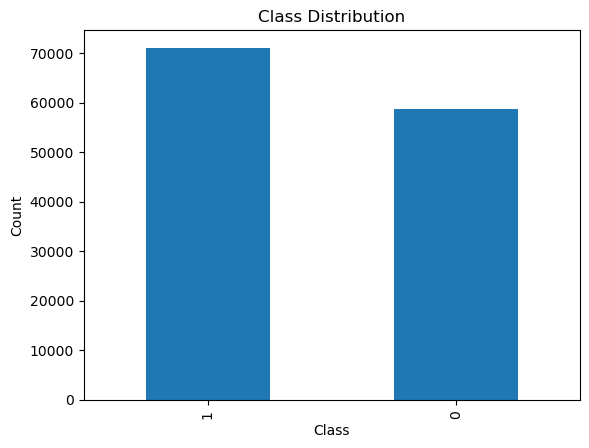

In [10]:
#'''''' Visualize class distribution
import matplotlib.pyplot as plt
df1['satisfaction'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


#1: satisfied 0: dissatisfied
#From the above graph the dataset is slightly imbalanced data. So, the data is quite balanced


# Checking For Missing values in the data

In [11]:
df1.isnull().sum().sort_values(ascending = False)

Arrival_Delay_in_Minutes             393
Inflight_entertainment                 0
Departure_Delay_in_Minutes             0
Online_boarding                        0
Cleanliness                            0
Checkin_service                        0
Baggage_handling                       0
Leg_room_service                       0
On_board_service                       0
Ease_of_Online_booking                 0
Online_support                         0
satisfaction                           0
Gender                                 0
Gate_location                          0
Food_and_drink                         0
Departure/Arrival_time_convenient      0
Seat_comfort                           0
Flight_Distance                        0
Class                                  0
Type_of_Travel                         0
Age                                    0
Customer_Type                          0
Inflight_wifi_service                  0
dtype: int64

<Axes: ylabel='Density'>

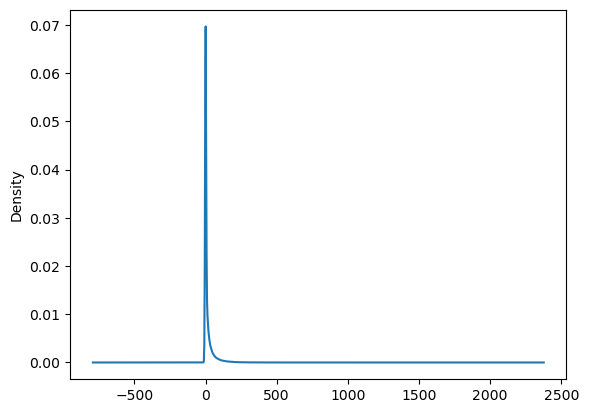

In [12]:
df1['Arrival_Delay_in_Minutes'].plot(kind='kde')


from the above graph this feauture is not a normal distribution so we can go with median to fill the null values


In [13]:
df1.isna().sum()

satisfaction                           0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Seat_comfort                           0
Departure/Arrival_time_convenient      0
Food_and_drink                         0
Gate_location                          0
Inflight_wifi_service                  0
Inflight_entertainment                 0
Online_support                         0
Ease_of_Online_booking                 0
On_board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Cleanliness                            0
Online_boarding                        0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
dtype: int64

# Replacing Missing values with median

In [14]:
df1['Arrival_Delay_in_Minutes'] = df1['Arrival_Delay_in_Minutes'].fillna(df1['Arrival_Delay_in_Minutes'].median())

In [15]:
df1.isna().sum()

satisfaction                         0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Seat_comfort                         0
Departure/Arrival_time_convenient    0
Food_and_drink                       0
Gate_location                        0
Inflight_wifi_service                0
Inflight_entertainment               0
Online_support                       0
Ease_of_Online_booking               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Cleanliness                          0
Online_boarding                      0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
dtype: int64

<Axes: ylabel='Density'>

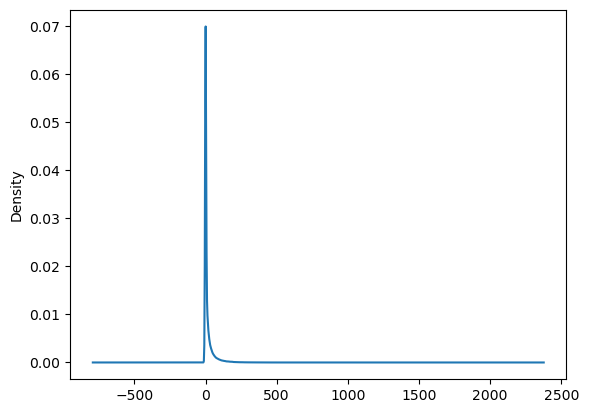

In [16]:
df1['Arrival_Delay_in_Minutes'].plot(kind='kde')


# EDA

<Axes: ylabel='satisfaction'>

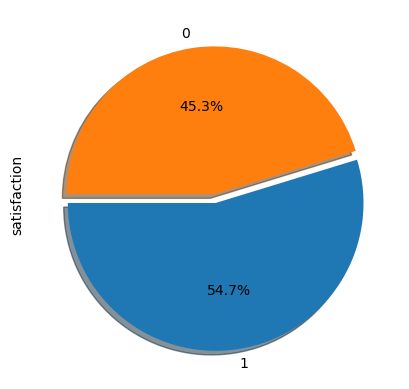

In [17]:
# 1. Satisfaction
round(df1['satisfaction'].value_counts()/df1.shape[0]*100,2).plot.pie(autopct='%1.1f%%',shadow=True, startangle=180,explode = [0.06, 0])


From the above graph people who are satisfied with service are more than the people who are not satisfied 

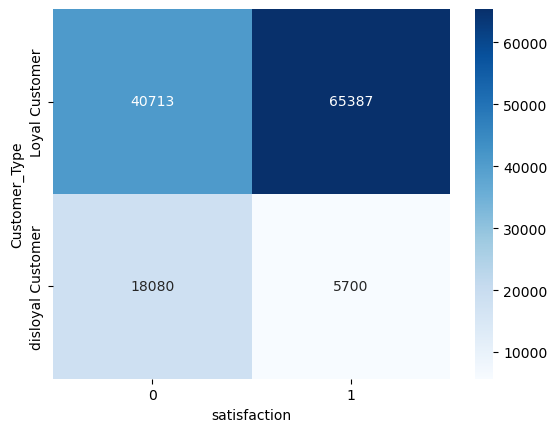

In [18]:
#2. Customer Type
df1['Customer_Type'].value_counts()
pd.crosstab(df1['Customer_Type'], df1['satisfaction'])
sns.heatmap(pd.crosstab(df1['Customer_Type'], df1['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");



Loyal customer satisfaction level high compared to the disloyal customer where their satisfaction level is low

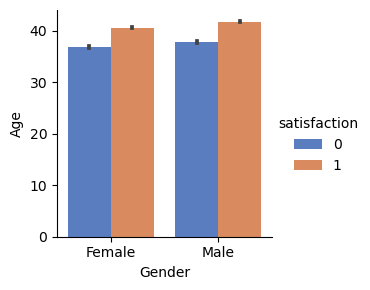

In [19]:
#3. Gender 
gend = sns.catplot(x = "Gender", y = "Age", hue = "satisfaction", data = df1,
                height = 3, kind = "bar", palette = "muted")
gend.despine(left= False)
gend.set_ylabels("Age")
plt.show()


Overall, the data suggests a relatively balanced satisfaction distribution between genders, with a slightly higher proportion of satisfied individuals across both male and female groups.

In [20]:
#4.Flight distance with Type of travel and Class
#g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=df1, kind="bar", height=4.5, aspect=.8)

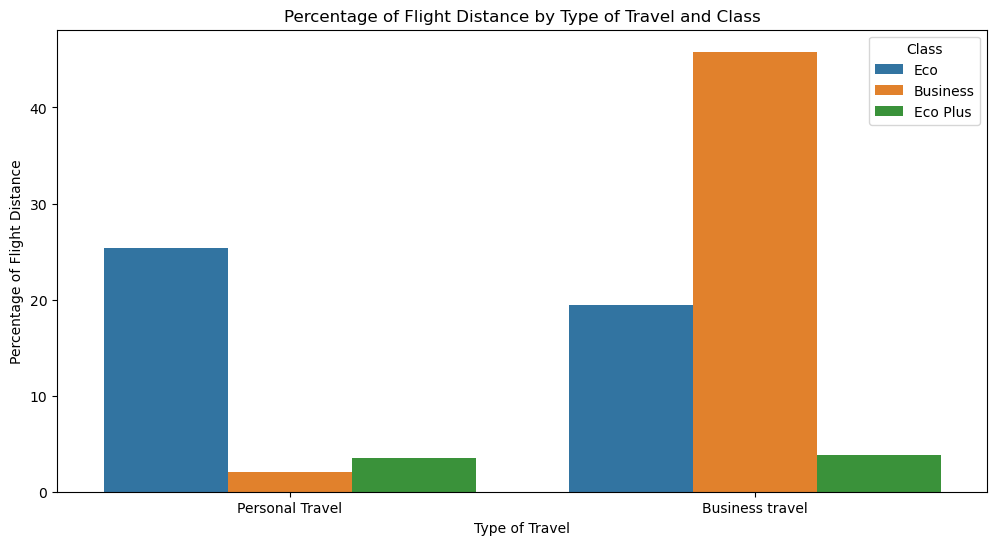

In [21]:
#4. Type of travel with flight distance and class
def percentage_of_combinations(x):
    return len(x) / len(df1) * 100

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Type_of_Travel", y="Flight_Distance", hue="Class", data=df1, estimator=percentage_of_combinations)

# Set labels and title
plt.xlabel("Type of Travel")
plt.ylabel("Percentage of Flight Distance")
plt.title("Percentage of Flight Distance by Type of Travel and Class")
# Show the plot
plt.legend(title="Class")
plt.show()

For Personal travel, people prefer Eco class more than businesss class and Eco plus.
For Bussiness travel, people prefer Business class more than Eco and Eco plus. People who travelled for Business purpose travelled more distance than people who travelled for personal purpose.

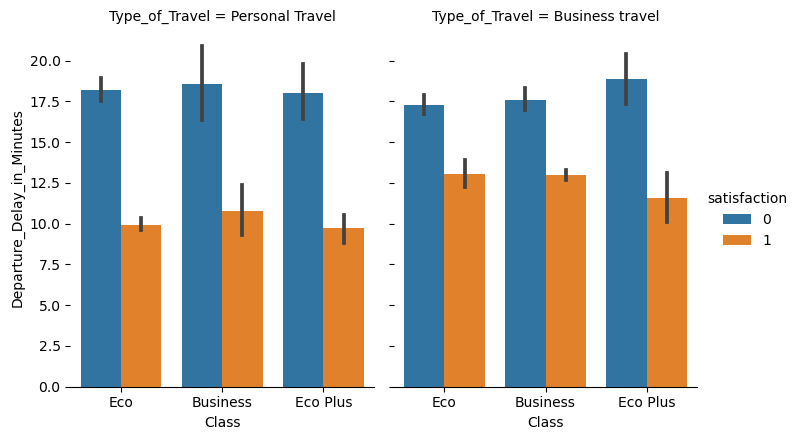

In [22]:
#5. Departure delay in minutes with type of travel and satisfaction 
g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=df1, kind="bar", height=4.5, aspect=.8)
g.despine(left= True)
g.set_ylabels("Departure_Delay_in_Minutes")
plt.show()


For Depature_Delay_in_minutes people who are travelled for Business and personal purpose are widely not satisified with the service.

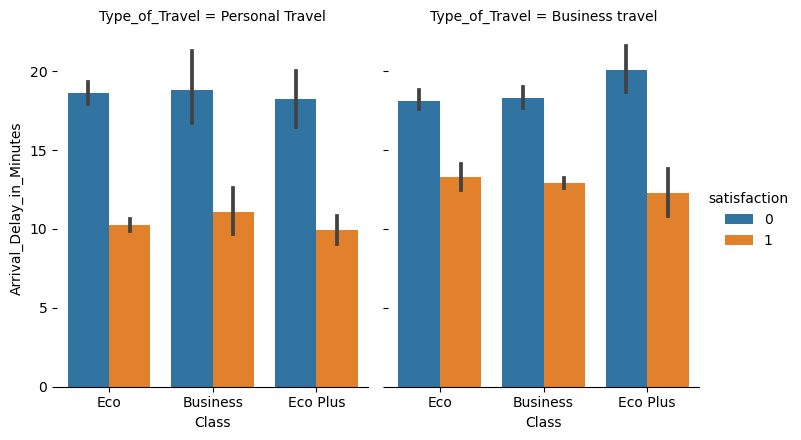

In [23]:
#6. Arrival delay in minutes with type of travel and satisfaction 
g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=df1, kind="bar", height=4.5, aspect=.8)
g.despine(left= True)
g.set_ylabels("Arrival_Delay_in_Minutes")
plt.show()


For Arrival_Delay_in_Minutes people who are travelled for Business and personal purpose are widely not satisified 


because flight was arrived with delay of 17 to 20 min.

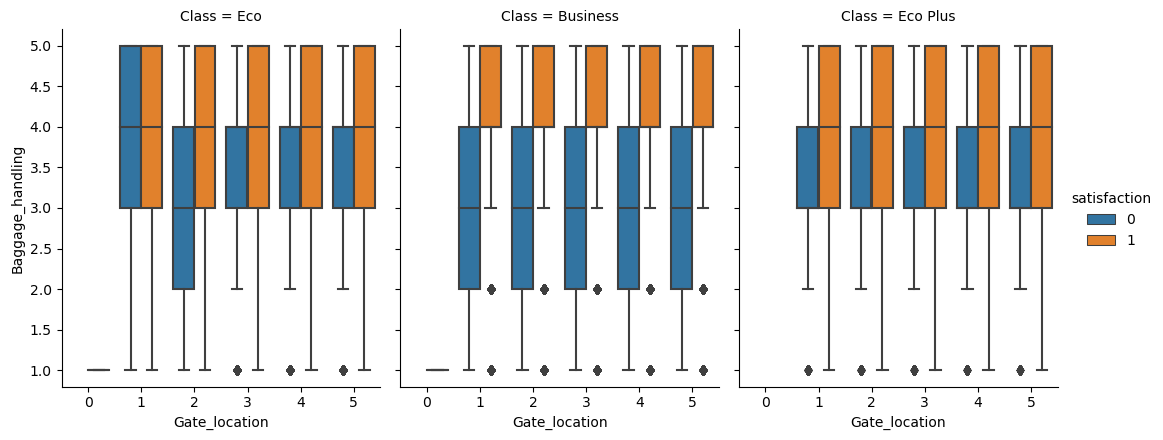

In [24]:
#7. Gate_location and Baggage_hanling with Class
g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=df1, kind="box", height=4.5, aspect=.8)
g.despine(left= False)
g.set_ylabels("Baggage_handling")
plt.show()


Gate_location for Class Business is having more no. of dissatisaction they rated this within 2 to 4 points.




For Eco Plus Class the  Gate_location people who are statisfied is more and the rate within 3 to 5 points.

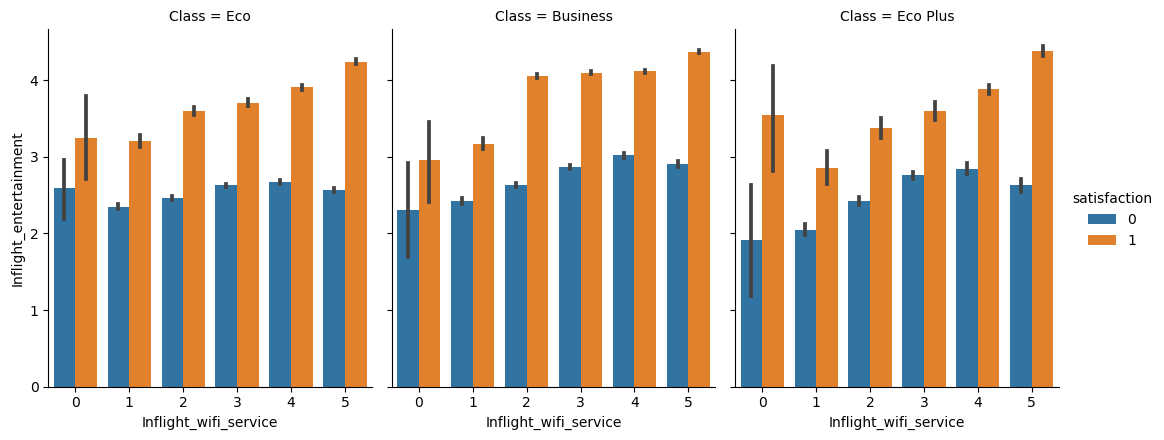

In [25]:
#8. Inflight_wifi_service and Inflight_entertainment with Class
d = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=df1, kind="bar", height=4.5, aspect=.8)
d.despine(left= False)
d.set_ylabels("Inflight_entertainment")
plt.show()


Inflight_wifi_service: People from the class Eco,Business and Eco_plus are satisfied and most of them given 5 for this service.

<Figure size 800x400 with 0 Axes>

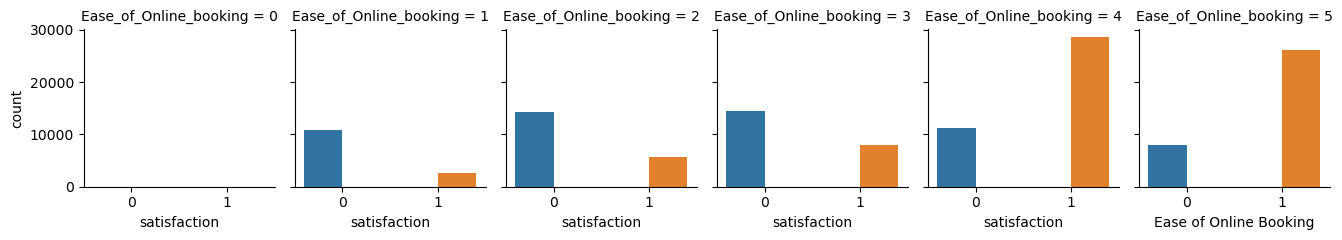

In [26]:
#9. Ease_of_Online_booking with satisafaction
plt.figure(figsize=(8, 4))
#sns.barplot(x="Ease_of_Online_booking", y="satisfaction", data=df1, palette="muted")
g = sns.catplot(x="satisfaction", col="Ease_of_Online_booking", hue = 'satisfaction', col_wrap=6, data=df1, kind="count", height=2.5, aspect=.9)
plt.xlabel("Ease of Online Booking")
plt.ylabel("Satisfaction")
plt.show()

In Ease_of_Online_booking most of passengers are really satisfied and they gave rating as 4 and 5. Only few are dissatisfied.

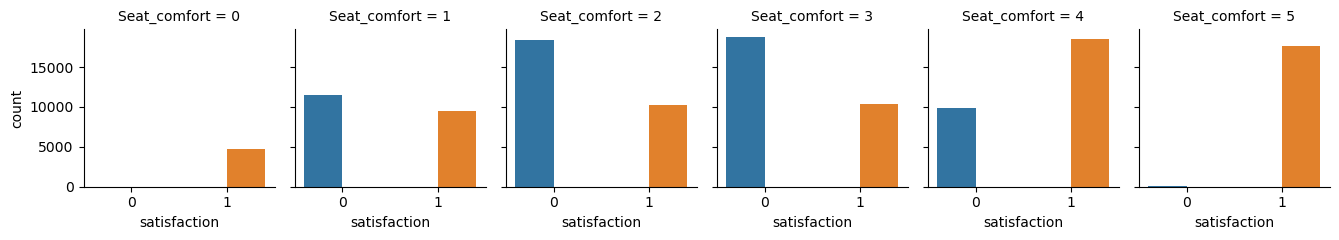

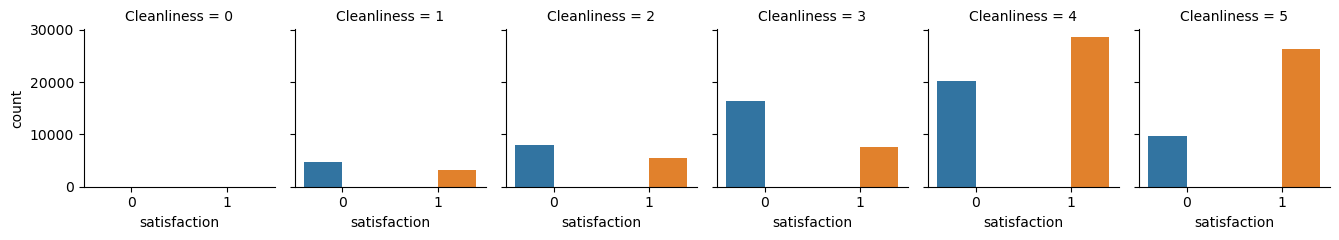

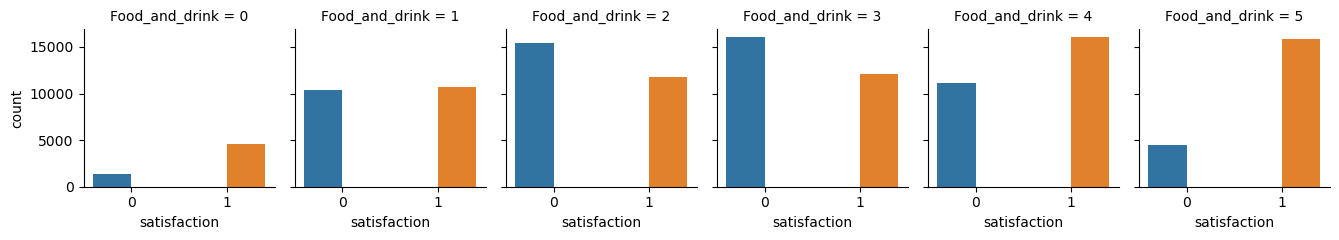

In [27]:
#10. Seat_comfort, Cleanliness, Food_and_drink
g = sns.catplot(x="satisfaction", col="Seat_comfort", hue = 'satisfaction', col_wrap=6, data=df1, kind="count", height=2.5, aspect=.9)
g = sns.catplot(x="satisfaction", col="Cleanliness", hue = 'satisfaction', col_wrap=6, data=df1, kind="count", height=2.5, aspect=.9)
g = sns.catplot(x="satisfaction", col="Food_and_drink", hue = 'satisfaction', col_wrap=6, data=df1, kind="count", height=2.5, aspect=.9)


For the above three features maximum number of satisfied passengers belongs to the category who gave 4 and 5 rating.


The passengers who gave rating 0 to 3 are mostly dissatisfied passengers.

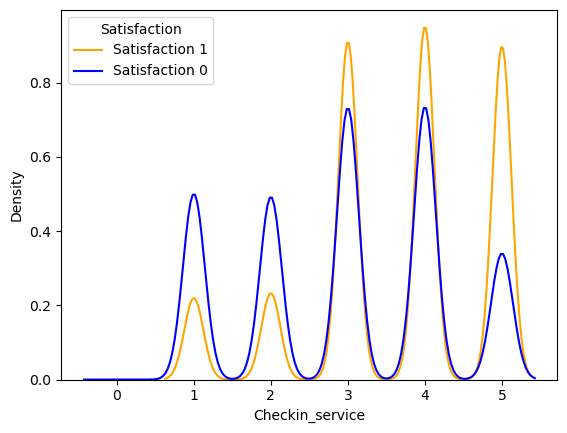

In [28]:
#11. Checkin_service
satisfaction_values = df1['satisfaction'].unique()

#custom colors for each 'satisfaction' value
custom_colors = ['orange', 'blue']  

# subplots
fig, ax = plt.subplots()

# Iterating through 'satisfaction' values and plot KDE for 'Checkin_service' with custom colors
for satisfaction_value, color in zip(satisfaction_values, custom_colors):
    subset = df1[df1['satisfaction'] == satisfaction_value]
    sns.kdeplot(data=subset, x='Checkin_service', label=f'Satisfaction {satisfaction_value}', color=color, ax=ax)

plt.xlabel("Checkin_service")
plt.ylabel("Density")
plt.legend(title="Satisfaction")
plt.show()

For Checkin_service most of the satisfied people have rated 3 to 5, dissatisfied people have given rating with 3 and 4.  

Overall passengers are satisfied with the Checkin_service.

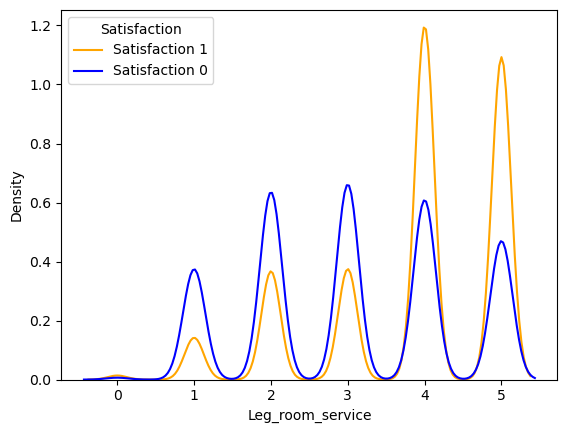

In [29]:
#12. Leg_room_service
satisfaction_values = df1['satisfaction'].unique()
custom_colors = ['orange', 'blue']  

fig, ax = plt.subplots()

for satisfaction_value, color in zip(satisfaction_values, custom_colors):
    subset = df1[df1['satisfaction'] == satisfaction_value]
    sns.kdeplot(data=subset, x='Leg_room_service', label=f'Satisfaction {satisfaction_value}', color=color, ax=ax)

plt.xlabel("Leg_room_service")
plt.ylabel("Density")
plt.legend(title="Satisfaction")
plt.show()

For Leg_room_service most of the satisfied people have rated 4 and 5, dissatisfied people have given the rating equally from 0 to 5.  

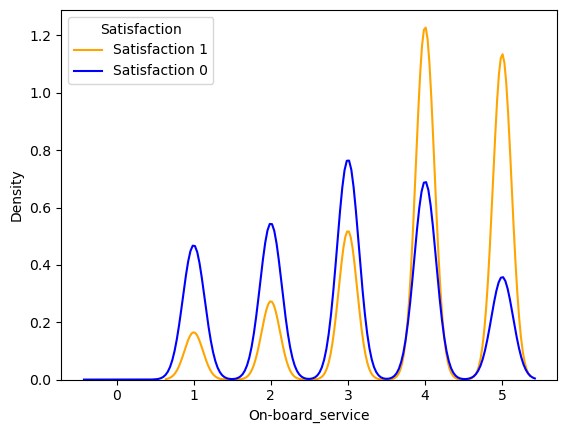

In [30]:
#13.On-board_service
satisfaction_values = df1['satisfaction'].unique()

custom_colors = ['orange', 'blue']

fig, ax = plt.subplots()
for satisfaction_value, color in zip(satisfaction_values, custom_colors):
    subset = df1[df1['satisfaction'] == satisfaction_value]
    sns.kdeplot(data=subset, x='On_board_service', label=f'Satisfaction {satisfaction_value}', color=color, ax=ax)

plt.xlabel("On-board_service")
plt.ylabel("Density")
plt.legend(title="Satisfaction")
plt.show()

For On-board_service most of the satisfied people have rated 4 and 5, dissatisfied people have given the rating equally from 0 to 5

# Label encoding

In [31]:
from sklearn import preprocessing
columns_to_encode = ['Customer_Type','Type_of_Travel','Class','Gender']

label_encoder = preprocessing.LabelEncoder()

for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column])
    unique_values = df1[column].unique()
    print("Unique values in '{}' column:".format(column), unique_values)


Unique values in 'Customer_Type' column: [0 1]
Unique values in 'Type_of_Travel' column: [1 0]
Unique values in 'Class' column: [1 0 2]
Unique values in 'Gender' column: [0 1]


In [32]:
'''
Customer type = Loyal customer:0, disloyal Customer = 1,
Type of travel = Business travel:0, personal travel:1,
Class = Eco:1, Business:0, Eco-plus:2
Gender = Female:0, Male:1
'''

'\nCustomer type = Loyal customer:0, disloyal Customer = 1,\nType of travel = Business travel:0, personal travel:1,\nClass = Eco:1, Business:0, Eco-plus:2\nGender = Female:0, Male:1\n'

In [33]:
df1

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,1,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,1,63,1,0,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,1,69,1,1,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,1,66,1,1,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


# Detecting outliers using boxplot

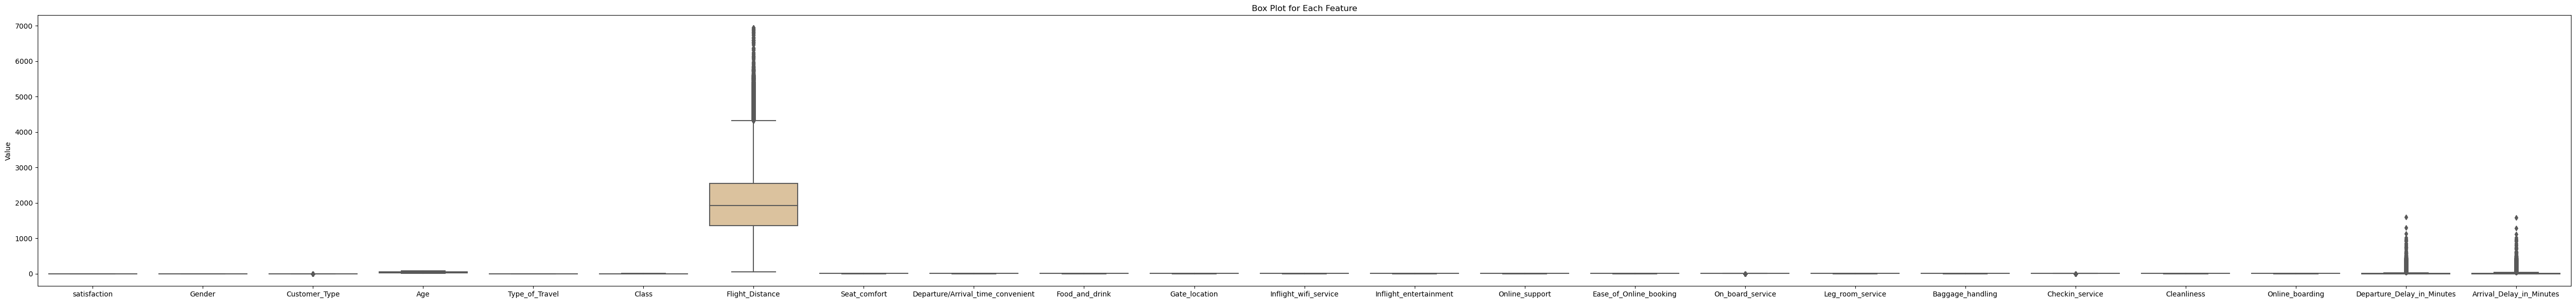

In [34]:
plt.figure(figsize=(65,7))  # Adjust the figure size as needed

sns.boxplot(data=df1, orient='v', palette='Set2')  # 'v' for vertical orientation
plt.title('Box Plot for Each Feature')
plt.ylabel('Value')

# Show the plot
plt.show()

From the above plot Flight_Distance, Departure_Delay_in_Minutes and Arrival_Dealy_in_Minutes is having outliers

In [35]:
np.percentile(df1['Flight_Distance'],25)
np.percentile(df1['Flight_Distance'],75)
iqr = np.percentile(df1['Flight_Distance'],75) - np.percentile(df1['Flight_Distance'],25)
lower_bound = np.percentile(df1['Flight_Distance'],25) -(1.5*iqr)
upper_bound = np.percentile(df1['Flight_Distance'],25)+(1.5*iqr)
print(lower_bound,upper_bound)

-418.5 3136.5


In [36]:
def percentile_ate_first_view(data, col, start, end, jump):
    for i in range(start, end, jump):
        var = data[col].values
        var = np.sort(var, axis= None)
        print("{} percentile value is {}".format(i, var[int(len(var)*(float(i)/100))]))
    print("100 percentile value is ", var[-1])

percentile_ate_first_view (df1, 'Flight_Distance', 0, 100, 10)

0 percentile value is 50
10 percentile value is 545
20 percentile value is 1136
30 percentile value is 1509
40 percentile value is 1725
50 percentile value is 1925
60 percentile value is 2134
70 percentile value is 2389
80 percentile value is 2739
90 percentile value is 3399
100 percentile value is  6951


In [37]:
def percentile_ate_first_view(data, col):
    for i in np.arange(0.0, 1.0, 0.1):
        var = data[col].values
        var = np.sort(var, axis= None)
        print("{} percentile value is {}".format(99+i, var[int(len(var)*(float(99+i)/100))]))
    print("100 percentile value is ", var[-1])

percentile_ate_first_view (df1, 'Flight_Distance')

99.0 percentile value is 4820
99.1 percentile value is 4878
99.2 percentile value is 4946
99.3 percentile value is 5020
99.4 percentile value is 5088
99.5 percentile value is 5154
99.6 percentile value is 5243
99.7 percentile value is 5343
99.8 percentile value is 5486
99.9 percentile value is 5693
100 percentile value is  6951


In [38]:
df1[df1['Flight_Distance']>5693]

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
540,1,0,0,13,1,1,6792,0,5,0,...,1,3,4,5,5,1,3,1,3,0.0
588,1,0,0,63,1,0,6591,0,5,0,...,1,3,2,4,3,1,5,1,3,0.0
1160,0,1,0,35,1,1,6470,1,1,1,...,3,1,2,2,2,3,2,3,0,32.0
2859,0,0,0,47,1,1,6811,1,3,1,...,3,3,3,3,5,3,2,3,0,0.0
5885,0,0,0,45,1,1,6097,1,5,1,...,3,1,2,3,3,3,2,3,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122235,1,1,0,30,0,0,5722,1,1,1,...,5,5,4,4,4,4,5,5,0,0.0
126755,1,0,0,24,0,0,5736,3,3,2,...,5,3,5,3,2,5,3,5,140,144.0
126795,1,0,0,41,0,0,5842,4,4,4,...,5,3,3,5,5,5,5,5,222,243.0
127938,1,0,0,56,0,0,6468,3,3,5,...,5,3,3,5,4,5,3,5,0,0.0


In [39]:
np.percentile(df1['Departure_Delay_in_Minutes'],25)
np.percentile(df1['Departure_Delay_in_Minutes'],75)
iqr = np.percentile(df1['Departure_Delay_in_Minutes'],75) - np.percentile(df1['Departure_Delay_in_Minutes'],25)
lower_bound = np.percentile(df1['Departure_Delay_in_Minutes'],25) -(1.5*iqr)
upper_bound = np.percentile(df1['Departure_Delay_in_Minutes'],25)+(1.5*iqr)
print(lower_bound,upper_bound)

-18.0 18.0


In [40]:
def percentile_ate_first_view(data, col, start, end, jump):
    for i in range(start, end, jump):
        var = data[col].values
        var = np.sort(var, axis= None)
        print("{} percentile value is {}".format(i, var[int(len(var)*(float(i)/100))]))
    print("100 percentile value is ", var[-1])

percentile_ate_first_view (df1, 'Departure_Delay_in_Minutes', 0, 100, 10)

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 2
70 percentile value is 8
80 percentile value is 19
90 percentile value is 44
100 percentile value is  1592


In [41]:
def percentile_ate_first_view(data, col):
    for i in np.arange(0.0, 1.0, 0.1):
        var = data[col].values
        var = np.sort(var, axis= None)
        print("{} percentile value is {}".format(99+i, var[int(len(var)*(float(99+i)/100))]))
    print("100 percentile value is ", var[-1])

percentile_ate_first_view (df1, 'Departure_Delay_in_Minutes')

99.0 percentile value is 180
99.1 percentile value is 186
99.2 percentile value is 194
99.3 percentile value is 203
99.4 percentile value is 214
99.5 percentile value is 232
99.6 percentile value is 250
99.7 percentile value is 277
99.8 percentile value is 315
99.9 percentile value is 381
100 percentile value is  1592


In [42]:
df1[df1['Departure_Delay_in_Minutes']>381]

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
41,1,0,0,17,1,1,2748,0,1,0,...,4,3,1,3,4,4,1,4,427,440.0
3539,0,0,0,45,1,1,2460,1,4,1,...,5,3,4,4,5,5,5,5,794,795.0
3758,0,1,0,30,1,1,3468,1,4,1,...,1,5,3,4,4,1,4,1,978,970.0
4778,0,1,0,48,1,1,4318,1,4,1,...,1,3,3,2,2,1,2,1,626,604.0
5741,0,0,0,7,1,1,1990,1,5,0,...,4,4,4,5,1,4,2,4,724,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127820,1,1,0,23,0,1,2563,5,2,2,...,5,1,1,2,4,5,1,5,750,729.0
128201,1,1,0,42,0,0,3063,3,3,3,...,5,4,5,5,4,5,5,5,423,403.0
128324,1,1,0,41,0,0,5382,1,1,1,...,5,4,2,4,5,5,4,5,501,500.0
128326,1,1,0,33,0,0,3553,3,3,3,...,5,4,3,2,2,5,3,5,465,493.0


In [43]:
np.percentile(df1['Arrival_Delay_in_Minutes'],25)
np.percentile(df1['Arrival_Delay_in_Minutes'],75)
iqr = np.percentile(df1['Arrival_Delay_in_Minutes'],75) - np.percentile(df1['Arrival_Delay_in_Minutes'],25)
lower_bound = np.percentile(df1['Arrival_Delay_in_Minutes'],25) -(1.5*iqr)
upper_bound = np.percentile(df1['Arrival_Delay_in_Minutes'],25)+(1.5*iqr)
print(lower_bound,upper_bound)

-19.5 19.5


In [44]:
def percentile_ate_first_view(data, col, start, end, jump):
    for i in range(start, end, jump):
        var = data[col].values
        var = np.sort(var, axis= None)
        print("{} percentile value is {}".format(i, var[int(len(var)*(float(i)/100))]))
    print("100 percentile value is ", var[-1])

percentile_ate_first_view (df1, 'Arrival_Delay_in_Minutes', 0, 100, 10)

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 2.0
70 percentile value is 8.0
80 percentile value is 19.0
90 percentile value is 44.0
100 percentile value is  1584.0


In [45]:
def percentile_ate_first_view(data, col):
    for i in np.arange(0.0, 1.0, 0.1):
        var = data[col].values
        var = np.sort(var, axis= None)
        print("{} percentile value is {}".format(99+i, var[int(len(var)*(float(99+i)/100))]))
    print("100 percentile value is ", var[-1])

percentile_ate_first_view (df1, 'Arrival_Delay_in_Minutes')

99.0 percentile value is 182.0
99.1 percentile value is 187.0
99.2 percentile value is 196.0
99.3 percentile value is 207.0
99.4 percentile value is 219.0
99.5 percentile value is 236.0
99.6 percentile value is 255.0
99.7 percentile value is 280.0
99.8 percentile value is 317.0
99.9 percentile value is 383.0
100 percentile value is  1584.0


In [46]:
df1[df1['Arrival_Delay_in_Minutes']>383]

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
41,1,0,0,17,1,1,2748,0,1,0,...,4,3,1,3,4,4,1,4,427,440.0
3539,0,0,0,45,1,1,2460,1,4,1,...,5,3,4,4,5,5,5,5,794,795.0
3758,0,1,0,30,1,1,3468,1,4,1,...,1,5,3,4,4,1,4,1,978,970.0
4778,0,1,0,48,1,1,4318,1,4,1,...,1,3,3,2,2,1,2,1,626,604.0
5741,0,0,0,7,1,1,1990,1,5,0,...,4,4,4,5,1,4,2,4,724,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127610,1,0,0,26,0,0,3894,4,4,4,...,5,5,4,4,4,5,5,5,493,485.0
127820,1,1,0,23,0,1,2563,5,2,2,...,5,1,1,2,4,5,1,5,750,729.0
128201,1,1,0,42,0,0,3063,3,3,3,...,5,4,5,5,4,5,5,5,423,403.0
128324,1,1,0,41,0,0,5382,1,1,1,...,5,4,2,4,5,5,4,5,501,500.0


By removing the outliers entirely it is actually removing more rows. 



So, retaining it prevent the loss of important information

In [47]:
df1

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,1,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,1,63,1,0,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,1,69,1,1,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,1,66,1,1,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


# Finding the correlation among the features

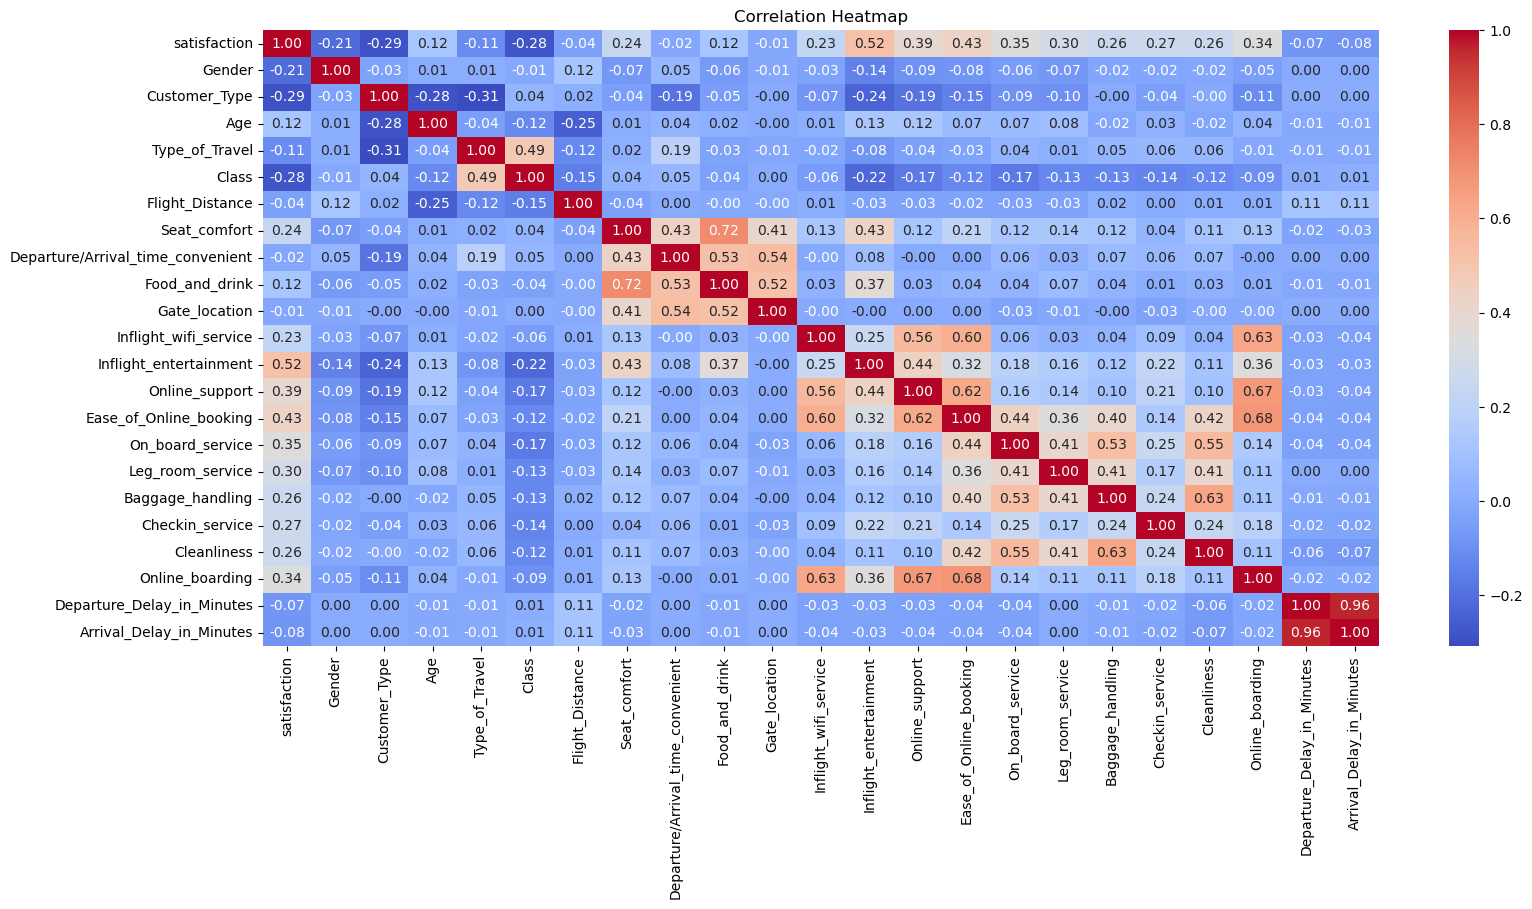

In [48]:
# Correlation heatmap
correlation_matrix = df1.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Seat_comfort is highly correlated with Food_and_drink.



Online_boarding is highly correlated with Ease_of_Online_booking. 



Online_support is highly correlated with Online_boarding.

# Feature Selection for builing the model

In [49]:
#Using mutual info 
from sklearn.model_selection import train_test_split
X=df1.drop(['satisfaction'],axis=1)
Y=df1['satisfaction']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.30,random_state=10)

In [50]:
from sklearn.feature_selection import mutual_info_classif
mutualinfo = mutual_info_classif(Xtrain, Ytrain)
mutualinfo

array([0.0293346 , 0.04584315, 0.023533  , 0.00954135, 0.05232272,
       0.02625955, 0.13997532, 0.00096845, 0.03811564, 0.01361645,
       0.03033271, 0.234314  , 0.09943786, 0.11073219, 0.06753969,
       0.05956405, 0.05467565, 0.04417201, 0.04943073, 0.0681061 ,
       0.00531882, 0.00688911])

In [51]:
mi_df = pd.DataFrame({'Feature': Xtrain.columns, 'Mutual_Info': mutualinfo})
mi_df_sorted = mi_df.sort_values(by='Mutual_Info', ascending=False)
print(mi_df_sorted)

                              Feature  Mutual_Info
11             Inflight_entertainment     0.234314
6                        Seat_comfort     0.139975
13             Ease_of_Online_booking     0.110732
12                     Online_support     0.099438
19                    Online_boarding     0.068106
14                   On_board_service     0.067540
15                   Leg_room_service     0.059564
16                   Baggage_handling     0.054676
4                               Class     0.052323
18                        Cleanliness     0.049431
1                       Customer_Type     0.045843
17                    Checkin_service     0.044172
8                      Food_and_drink     0.038116
10              Inflight_wifi_service     0.030333
0                              Gender     0.029335
5                     Flight_Distance     0.026260
2                                 Age     0.023533
9                       Gate_location     0.013616
3                      Type_of_

Inflight_entertainment     
Seat_comfort     
Ease_of_Online_booking     
Online_support     
On_board_service     
Online_boarding     
Leg_room_service     
Class     
Baggage_handling     
Customer_Type     
Food_and_drink     
Cleanliness     
Checkin_service    
Flight_Distance     
Inflight_wifi_service    
Gender     
Age    

The above are some the important feature which are going to be used in model building.

# Retaing only the important feature for Model building.

In [52]:
df2 = df1.drop(['Type_of_Travel','Arrival_Delay_in_Minutes','Departure/Arrival_time_convenient','Departure_Delay_in_Minutes'],axis = 1)

In [53]:
df2

,satisfaction,Gender,Customer_Type,Age,Class,Flight_Distance,Seat_comfort,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,1,0,0,65,1,265,0,0,2,2,4,2,3,3,0,3,5,3,2
1,1,1,0,47,0,2464,0,0,3,0,2,2,3,4,4,4,2,3,2
2,1,0,0,15,1,2138,0,0,3,2,0,2,2,3,3,4,4,4,2
3,1,0,0,60,1,623,0,0,3,3,4,3,1,1,0,1,4,1,3
4,1,0,0,70,1,354,0,0,3,4,3,4,2,2,0,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,1731,5,5,3,2,5,2,2,3,3,4,4,4,2
129876,0,1,1,63,0,2087,2,2,4,2,1,1,3,2,3,3,1,2,1
129877,0,1,1,69,1,2320,3,3,3,3,2,2,4,4,3,4,2,3,2
129878,0,1,1,66,1,2450,3,3,2,3,2,2,3,3,2,3,2,1,2


In [54]:
df1

,satisfaction,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Departure/Arrival_time_convenient,Food_and_drink,...,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,1,29,1,1,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,1,1,63,1,0,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,1,1,69,1,1,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,1,1,66,1,1,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


# Model Building

In [55]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
X = df2.drop('satisfaction', axis = 1)
y = df2['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [56]:
X_train

,Gender,Customer_Type,Age,Class,Flight_Distance,Seat_comfort,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
24986,0,0,43,1,75,1,1,1,5,5,5,5,3,4,5,5,5,5
52096,0,1,25,1,1145,3,3,4,4,3,4,4,1,4,4,1,3,4
114671,1,0,54,0,2281,5,5,5,5,5,4,5,5,5,5,5,5,3
76726,0,0,39,0,3459,2,5,5,5,4,3,2,2,2,2,3,2,3
89451,1,0,43,0,2454,5,5,5,2,3,5,4,4,4,4,5,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,1,1,45,0,1864,2,2,1,5,2,5,5,3,3,5,4,5,5
117952,0,0,52,0,1031,3,3,3,5,4,5,5,5,5,5,5,5,5
42613,0,1,47,1,2096,1,1,3,2,1,2,2,1,3,3,2,4,2
43567,1,1,38,1,2121,1,1,3,2,1,2,2,3,5,4,2,3,2


In [57]:
y_train

24986     1
52096     0
114671    1
76726     0
89451     1
         ..
45891     0
117952    1
42613     0
43567     0
68268     0
Name: satisfaction, Length: 103904, dtype: int64

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [59]:
y_pred_logistic = logistic_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("Logistic Regression Accuracy:", accuracy_logistic)
print("Decision Tree Accuracy:", accuracy_decision_tree)
print("Random Forest Accuracy:", accuracy_random_forest)
print("XGBoost Accuracy:", accuracy_xgb)


Logistic Regression Accuracy: 0.8041268863566369
Decision Tree Accuracy: 0.9301278102864182
Random Forest Accuracy: 0.9522636279642747
XGBoost Accuracy: 0.952610101632276


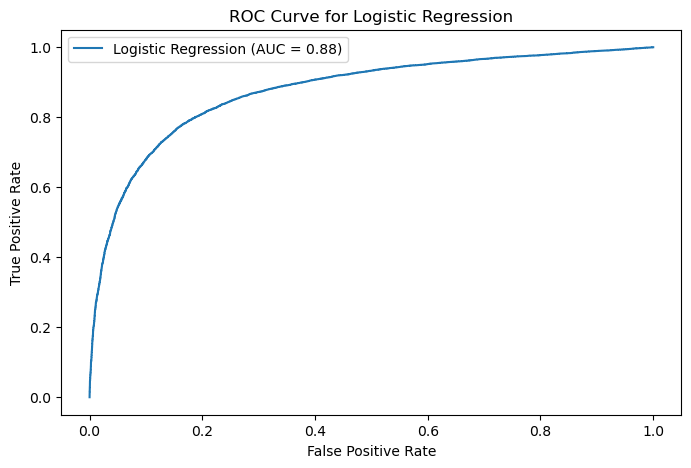

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78     11686
           1       0.81      0.84      0.82     14290

    accuracy                           0.80     25976
   macro avg       0.80      0.80      0.80     25976
weighted avg       0.80      0.80      0.80     25976

Logistic Regression Accuracy: 0.8041



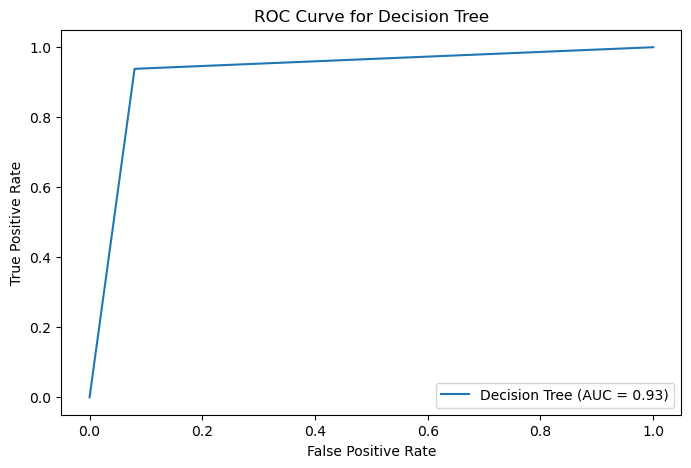

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11686
           1       0.93      0.94      0.94     14290

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Decision Tree Accuracy: 0.9301



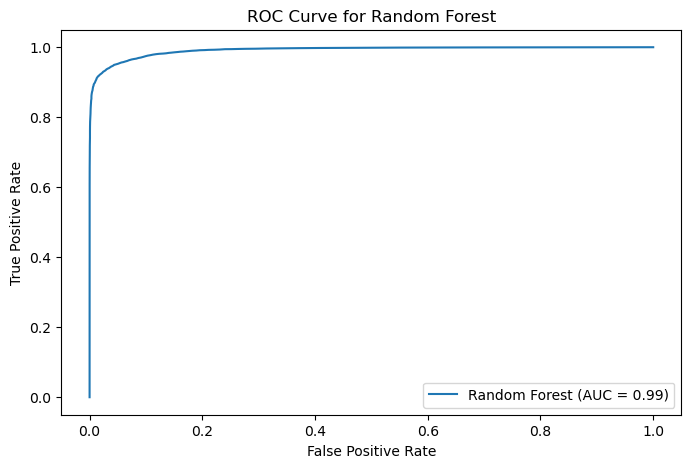

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11686
           1       0.96      0.95      0.96     14290

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Random Forest Accuracy: 0.9523



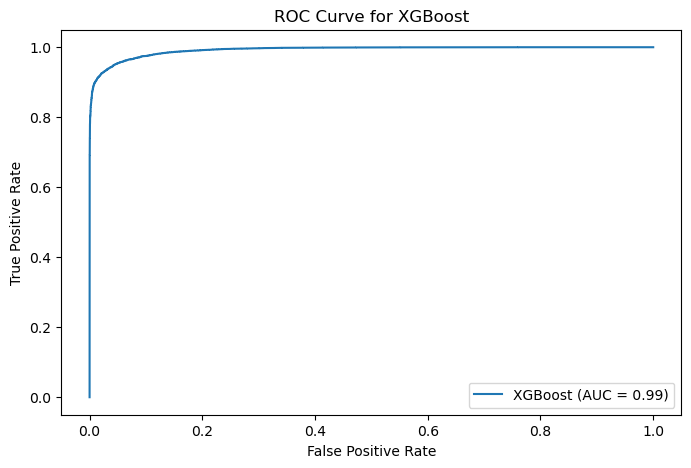

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11686
           1       0.96      0.95      0.96     14290

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

XGBoost Accuracy: 0.9526



In [60]:
from sklearn.metrics import roc_curve,roc_auc_score, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create a dictionary of models and their names
models = {
    "Logistic Regression": logistic_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "XGBoost": xgb_model
}

# Initialize empty dictionaries to store ROC curve data and AUC scores
roc_curves = {}
auc_scores = {}

# Iterate through models
for model_name, model1 in models.items():
    # Predict probabilities for the positive class
    y_prob = model1.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[model_name] = (fpr, tpr)
    
    # Calculate AUC score
    auc = roc_auc_score(y_test, y_prob)
    auc_scores[model_name] = auc
    
    # Calculate predictions and metrics
    y_pred = model1.predict(X_test)
    classification_rep = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend()
    plt.show()
    
    # Print classification report and accuracy
    print(f"{model_name} Classification Report:\n{classification_rep}")
    print(f"{model_name} Accuracy: {accuracy:.4f}\n")

# Arranging the models in descending order the based on the higher to lower accuracy 

In [61]:
accuracy_scores = {}

# Iterate through models
for model_name, model in models.items():
    # Calculate predictions and metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

# Sort the accuracy scores in descending order
sorted_accuracy_scores = dict(sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True))

# Print the accuracies in descending order
print("Model Comparison based on Accuracy (Highest to Lowest):")
for model_name, accuracy in sorted_accuracy_scores.items():
    print(f"{model_name}: {accuracy:.4f}")

Model Comparison based on Accuracy (Highest to Lowest):
XGBoost: 0.9526
Random Forest: 0.9523
Decision Tree: 0.9301
Logistic Regression: 0.8041


# HpyerTuning Logistic as it is giving less accuracy

In [62]:
logistic_regression1 = LogisticRegression()

#Define hyperparameters and their possible values
param_grid = {
    'C': [0.5,0.001,0.1,0.01,0.2],  # Inverse of regularization strength
    'penalty': ['l1','l2','elasticnet','none'],  # Regularization type
    'solver': ['liblinear','lbfgs','sag','saga','newton-cg']  # Algorithm to use for optimization
}

#Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(logistic_regression1, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

#Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'C': 0.2, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Test Set: 0.8263396981829381


# Building a model for Deployment purpose

In [63]:
depmodel = random_forest.fit(X_train, y_train)
input_data = (0,0,39,0,3459,2,5,5,5,4,3,2,2,2,2,3,2,3)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = depmodel.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Customer is dissatisfied')
else:
  print('The Customer is satisfied')

[0]
The Customer is dissatisfied


# SAVING THE TRAINED MODEL

In [64]:
import pickle

In [65]:
filename = 'trained_model.sav'
pickle.dump(depmodel, open(filename, 'wb'))

In [66]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [67]:
input_data = (0,0,39,0,3459,2,5,5,5,4,3,2,2,2,2,3,2,3)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Customer is not satisfied')
else:
  print('The Customer is satisfied')

[0]
The Customer is not satisfied
